In [159]:
#Import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy import stats
import statsmodels.api as sm
import warnings
from itertools import product
from datetime import datetime
warnings.filterwarnings('ignore')
plt.style.use('seaborn-poster')
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import roc_auc_score, accuracy_score
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error,mean_absolute_error, mean_absolute_percentage_error
from sklearn import svm
from sklearn.model_selection import GridSearchCV

In [160]:
df = pd.read_csv("https://raw.githubusercontent.com/lavibula/ML20222.PredictionBitcoin/main/data/MinMax_Normalized_data.csv")
df

,Unnamed: 0,Date,BTC_close,BTC_open,BTC_high,BTC_low,BTC_volume,Active_Addr_Cnt,Difficulty,Mean_Block_Size(in_bytes),...,ETH,LTC,DOGE,XRP,GOLD,SILVER,COPPER,S&P500,DJI,JP225
0,0,2010-07-20,0.000000,0.000000,0.000000,0.000002,0.000090,0.000387,0.0,0.000266,...,0.000000,0.000000,0.000000,0.000000,0.139341,0.160779,0.000000,0.009671,0.009105,0.050664
1,1,2010-07-21,0.000000,0.000000,0.000000,0.000002,0.000410,0.000275,0.0,0.000074,...,0.000000,0.000000,0.000000,0.000000,0.139439,0.163766,0.000000,0.005966,0.005024,0.049703
2,2,2010-07-22,0.000000,0.000000,0.000000,0.000002,0.001991,0.000136,0.0,0.000062,...,0.000000,0.000000,0.000000,0.000000,0.143165,0.172374,0.656057,0.012389,0.012549,0.047129
3,3,2010-07-23,0.000000,0.000000,0.000000,0.000002,0.002231,0.000181,0.0,0.000045,...,0.000000,0.000000,0.000000,0.000000,0.135517,0.171858,0.657509,0.014787,0.016365,0.056461
4,4,2010-07-24,0.000000,0.000000,0.000000,0.000002,0.000330,0.000403,0.0,0.000435,...,0.000000,0.000000,0.000000,0.000000,0.135517,0.171858,0.657509,0.014787,0.016365,0.056461
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4649,4649,2023-04-12,0.442578,0.447362,0.441697,0.447419,0.078570,0.773109,1.0,0.762550,...,0.398592,0.237888,0.121416,0.181558,0.942636,0.371630,0.835348,0.812071,0.882433,0.885056
4650,4650,2023-04-13,0.449997,0.442661,0.442438,0.450208,0.065742,0.738798,1.0,0.714667,...,0.418459,0.243498,0.127160,0.184331,0.972446,0.384310,0.848651,0.826545,0.896721,0.888355
4651,4651,2023-04-14,0.451257,0.449992,0.448827,0.452643,0.098273,0.743463,1.0,0.693927,...,0.436733,0.249056,0.129145,0.188018,0.934105,0.371684,0.845372,0.824257,0.891312,0.903304
4652,4652,2023-04-15,0.448697,0.451253,0.443342,0.455398,0.031560,0.765144,1.0,0.725619,...,0.434781,0.249884,0.129411,0.186799,0.934105,0.371684,0.845372,0.824257,0.891312,0.903304


In [161]:
df.drop(columns=['Unnamed: 0'],inplace=True)
df=df[2653:4653]
df

,Date,BTC_close,BTC_open,BTC_high,BTC_low,BTC_volume,Active_Addr_Cnt,Difficulty,Mean_Block_Size(in_bytes),Sum_Block_Weight,...,ETH,LTC,DOGE,XRP,GOLD,SILVER,COPPER,S&P500,DJI,JP225
2653,2017-10-24,0.081640,0.087422,0.085584,0.082361,0.143662,0.699192,0.024992,0.410561,0.869502,...,0.061622,0.143762,0.001543,0.073309,0.224260,0.141038,0.659874,0.405914,0.501829,0.606180
2654,2017-10-25,0.084912,0.081639,0.083314,0.081037,0.105738,0.666737,0.024992,0.381814,0.905207,...,0.061447,0.145701,0.001571,0.072770,0.224946,0.139925,0.656806,0.402719,0.497640,0.601846
2655,2017-10-26,0.087186,0.084911,0.086538,0.085775,0.093570,0.542978,0.025912,0.288966,0.661668,...,0.061372,0.143633,0.001543,0.072626,0.215729,0.136829,0.655729,0.403586,0.500303,0.603275
2656,2017-10-27,0.085365,0.087185,0.086935,0.085812,0.083814,0.489231,0.030338,0.407045,0.537931,...,0.061557,0.142805,0.001517,0.071978,0.217886,0.135227,0.641161,0.409099,0.501546,0.615210
2657,2017-10-28,0.084802,0.085364,0.085097,0.085246,0.053094,0.406138,0.030338,0.397342,0.429011,...,0.061037,0.140944,0.001476,0.071295,0.217886,0.135227,0.641161,0.409099,0.501546,0.615210
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4648,2023-04-11,0.447364,0.438938,0.441865,0.446187,0.089267,0.838701,1.000000,0.659575,0.810885,...,0.393035,0.243602,0.122481,0.185921,0.936654,0.364244,0.829539,0.816602,0.883846,0.877978
4649,2023-04-12,0.442578,0.447362,0.441697,0.447419,0.078570,0.773109,1.000000,0.762550,0.837243,...,0.398592,0.237888,0.121416,0.181558,0.942636,0.371630,0.835348,0.812071,0.882433,0.885056
4650,2023-04-13,0.449997,0.442661,0.442438,0.450208,0.065742,0.738798,1.000000,0.714667,0.747626,...,0.418459,0.243498,0.127160,0.184331,0.972446,0.384310,0.848651,0.826545,0.896721,0.888355
4651,2023-04-14,0.451257,0.449992,0.448827,0.452643,0.098273,0.743463,1.000000,0.693927,0.737169,...,0.436733,0.249056,0.129145,0.188018,0.934105,0.371684,0.845372,0.824257,0.891312,0.903304


In [162]:
X_df = df.drop(columns=["BTC_close"])
y_df = df["BTC_close"]

In [163]:
X_df['Date'] = pd.to_datetime(X_df['Date'])

In [164]:
X_train_df, X_test_df, y_train_df, y_test_df = train_test_split(X_df, y_df, test_size=0.3, shuffle=False)
X_val_df, X_test_df, y_val_df, y_test_df = train_test_split(X_test_df, y_test_df, test_size=0.5, shuffle=False)
X_train_df[0:10]

,Date,BTC_open,BTC_high,BTC_low,BTC_volume,Active_Addr_Cnt,Difficulty,Mean_Block_Size(in_bytes),Sum_Block_Weight,Total_Fees(USD),...,ETH,LTC,DOGE,XRP,GOLD,SILVER,COPPER,S&P500,DJI,JP225
2653,2017-10-24,0.087422,0.085584,0.082361,0.143662,0.699192,0.024992,0.410561,0.869502,0.050631,...,0.061622,0.143762,0.001543,0.073309,0.224260,0.141038,0.659874,0.405914,0.501829,0.606180
2654,2017-10-25,0.081639,0.083314,0.081037,0.105738,0.666737,0.024992,0.381814,0.905207,0.037674,...,0.061447,0.145701,0.001571,0.072770,0.224946,0.139925,0.656806,0.402719,0.497640,0.601846
2655,2017-10-26,0.084911,0.086538,0.085775,0.093570,0.542978,0.025912,0.288966,0.661668,0.032598,...,0.061372,0.143633,0.001543,0.072626,0.215729,0.136829,0.655729,0.403586,0.500303,0.603275
2656,2017-10-27,0.087185,0.086935,0.085812,0.083814,0.489231,0.030338,0.407045,0.537931,0.045148,...,0.061557,0.142805,0.001517,0.071978,0.217886,0.135227,0.641161,0.409099,0.501546,0.615210
2657,2017-10-28,0.085364,0.085097,0.085246,0.053094,0.406138,0.030338,0.397342,0.429011,0.048363,...,0.061037,0.140944,0.001476,0.071295,0.217886,0.135227,0.641161,0.409099,0.501546,0.615210
2658,2017-10-29,0.084801,0.091249,0.085617,0.162994,0.662208,0.030338,0.398749,0.784547,0.079999,...,0.063304,0.146295,0.001719,0.072482,0.217886,0.135227,0.641161,0.409099,0.501546,0.617278
2659,2017-10-30,0.091037,0.090246,0.090737,0.078500,0.654785,0.030338,0.408216,0.767305,0.074057,...,0.063847,0.145804,0.001689,0.072806,0.223671,0.138703,0.642824,0.406901,0.498359,0.615353
2660,2017-10-31,0.090690,0.093739,0.091819,0.101145,0.605736,0.030338,0.409398,0.720688,0.071570,...,0.063158,0.143245,0.001670,0.071043,0.216611,0.134521,0.642707,0.407549,0.499422,0.615351
2661,2017-11-01,0.095500,0.097674,0.095802,0.133105,0.703517,0.030338,0.411378,0.811095,0.092331,...,0.060020,0.137015,0.001638,0.068453,0.223279,0.147636,0.649171,0.408643,0.501577,0.633497
2662,2017-11-02,0.099776,0.106389,0.101572,0.238783,0.670876,0.030338,0.409165,0.770478,0.091573,...,0.059249,0.140505,0.001631,0.072050,0.224064,0.146577,0.649265,0.408773,0.504607,0.638785


In [165]:

X_df['year'] = pd.to_datetime(X_df['Date']).dt.year
X_df['month'] = pd.to_datetime(X_df['Date']).dt.month
X_df['day'] = pd.to_datetime(X_df['Date']).dt.day


# Create an instance of the Support Vector Regressor

In [166]:
X_train_df, X_test_df, y_train_df, y_test_df = train_test_split(X_df, y_df, test_size=0.3, shuffle=False)
X_val_df, X_test_df, y_val_df, y_test_df = train_test_split(X_test_df, y_test_df, test_size=0.5, shuffle=False)

In [158]:
def mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true))
score = 1
for gamma in [0.00001,0.0001,0.001,0.01,0.1,1,10,100,1000,10000]:
  for C in [0.00001,0.0001,0.001,0.01,0.1,1,10,100,1000,10000]:
    for epsilon in [0.00001,0.0001,0.001,0.01,0.1,1,10,100,1000,10000]:
 # for each combination of parameters, train an SVC
      svr = SVR(gamma=gamma, C=C,epsilon=epsilon)
      model=svr.fit(X_train_df.drop('Date', axis=1), y_train_df)
 # evaluate the SVC on the test set
      y_val_pred = model.predict(X_val_df.drop('Date', axis=1)).reshape(-1,1)
      y_val_df = y_val_df.ravel()
      y_val_pred = y_val_pred.ravel()
 # if we got a better score, store the score and parameters
      if  mape(y_val_pred, y_val_df)< score:
        score = mape(y_val_pred, y_val_df)
        best_parameters = {'C': C, 'gamma': gamma,'epsilon':epsilon}
print("Best score: {:.2f}".format(score))
print("Best parameters: {}".format(best_parameters))

Best score: 0.02
Best parameters: {'C': 1000, 'gamma': 0.0001, 'epsilon': 1e-05}


In [167]:
model=SVR(C=1000, cache_size=200, coef0=0.0, degree=3, epsilon=0.00001,gamma=0.0001,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [168]:
model.fit(X_train_df.drop('Date', axis=1), y_train_df)

SVR(C=1000, epsilon=1e-05, gamma=0.0001)

In [169]:
y_train_pred = model.predict(X_train_df.drop('Date', axis=1))
y_train_pred[:20]


array([0.08431104, 0.08294608, 0.08652066, 0.0865279 , 0.08535667,
       0.0890274 , 0.09117333, 0.09349108, 0.09863653, 0.10535491,
       0.10720245, 0.10759008, 0.11043473, 0.106584  , 0.10608572,
       0.11109583, 0.10840544, 0.10185149, 0.09642978, 0.08867009])

In [170]:
y_train_df[0:20]

2653    0.081640
2654    0.084912
2655    0.087186
2656    0.085365
2657    0.084802
2658    0.091035
2659    0.090692
2660    0.095533
2661    0.099777
2662    0.104027
2663    0.105912
2664    0.109047
2665    0.109428
2666    0.103055
2667    0.105182
2668    0.110241
2669    0.105579
2670    0.097230
2671    0.093884
2672    0.087046
Name: BTC_close, dtype: float64

In [171]:
y_train_df = y_train_df.ravel()
y_train_pred = y_train_pred.ravel()


In [172]:

def mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true))

print('MAPE for traning data: ', mape(y_train_df, y_train_pred)*100, '%')


MAPE for traning data:  1.4586325161603055 %


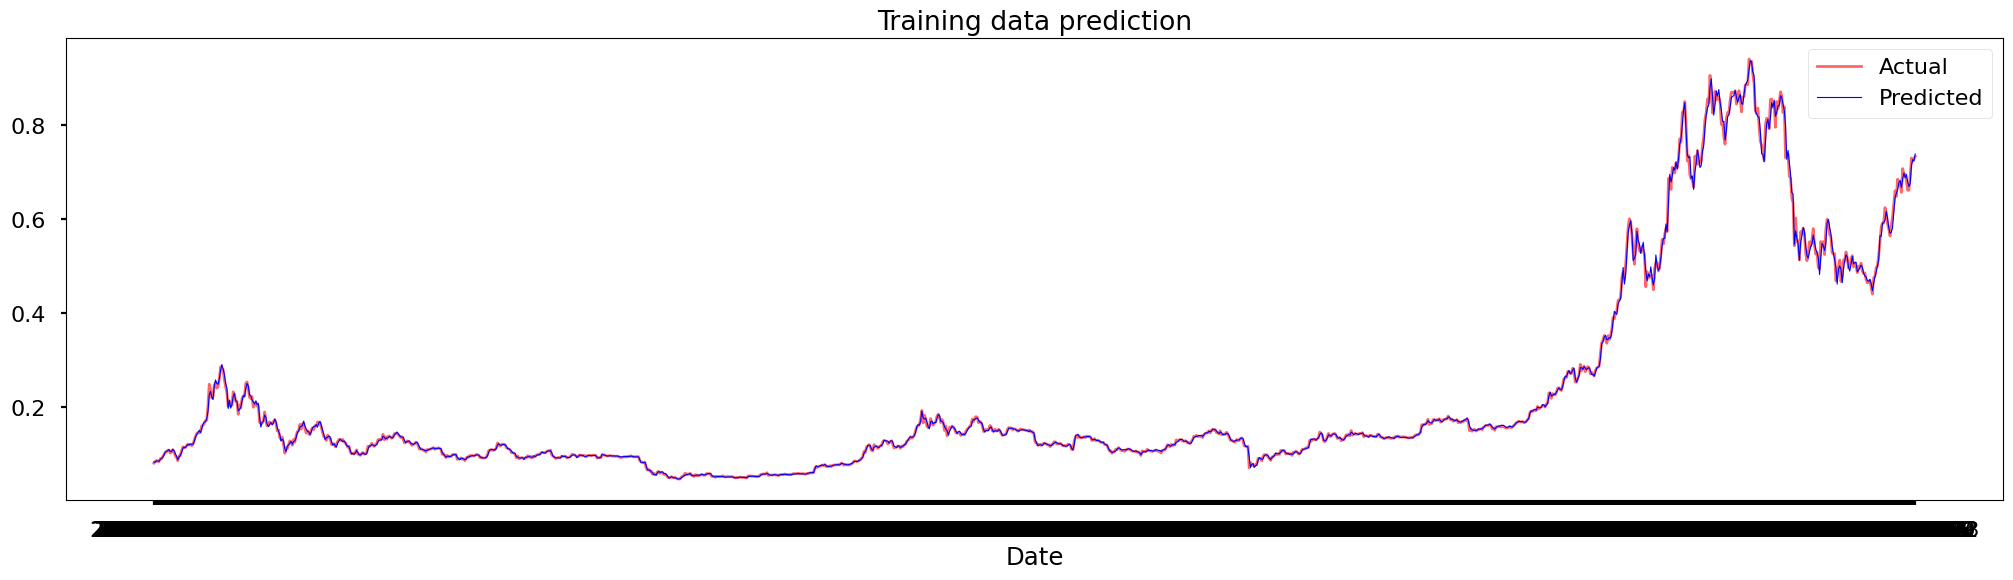

In [173]:
plt.figure(figsize=(25,6))
plt.plot(df[:1400]['Date'], y_train_df, color = 'red', linewidth=2.0, alpha = 0.6)
plt.plot(df[:1400]['Date'], y_train_pred, color = 'blue', linewidth=0.8)
plt.legend(['Actual','Predicted'])
plt.xlabel('Date')
plt.title("Training data prediction")
plt.show()

In [174]:
y_val_pred = model.predict(X_val_df.drop('Date', axis=1))
y_val_pred[:10]

array([0.72360425, 0.71562619, 0.70983545, 0.70895572, 0.72395235,
       0.72189747, 0.70968462, 0.70407109, 0.70400891, 0.72876647])

In [175]:

y_val_df[0:10]

4053    0.706592
4054    0.725544
4055    0.693514
4056    0.726578
4057    0.724102
4058    0.722329
4059    0.695900
4060    0.697939
4061    0.722951
4062    0.729688
Name: BTC_close, dtype: float64

In [176]:
y_val_df = y_val_df.ravel()
y_val_pred = y_val_pred.ravel()

In [177]:

def mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true))

print('MAPE for validation data: ', mape(y_val_df, y_val_pred)*100, '%')

MAPE for validation data:  1.548501668451524 %


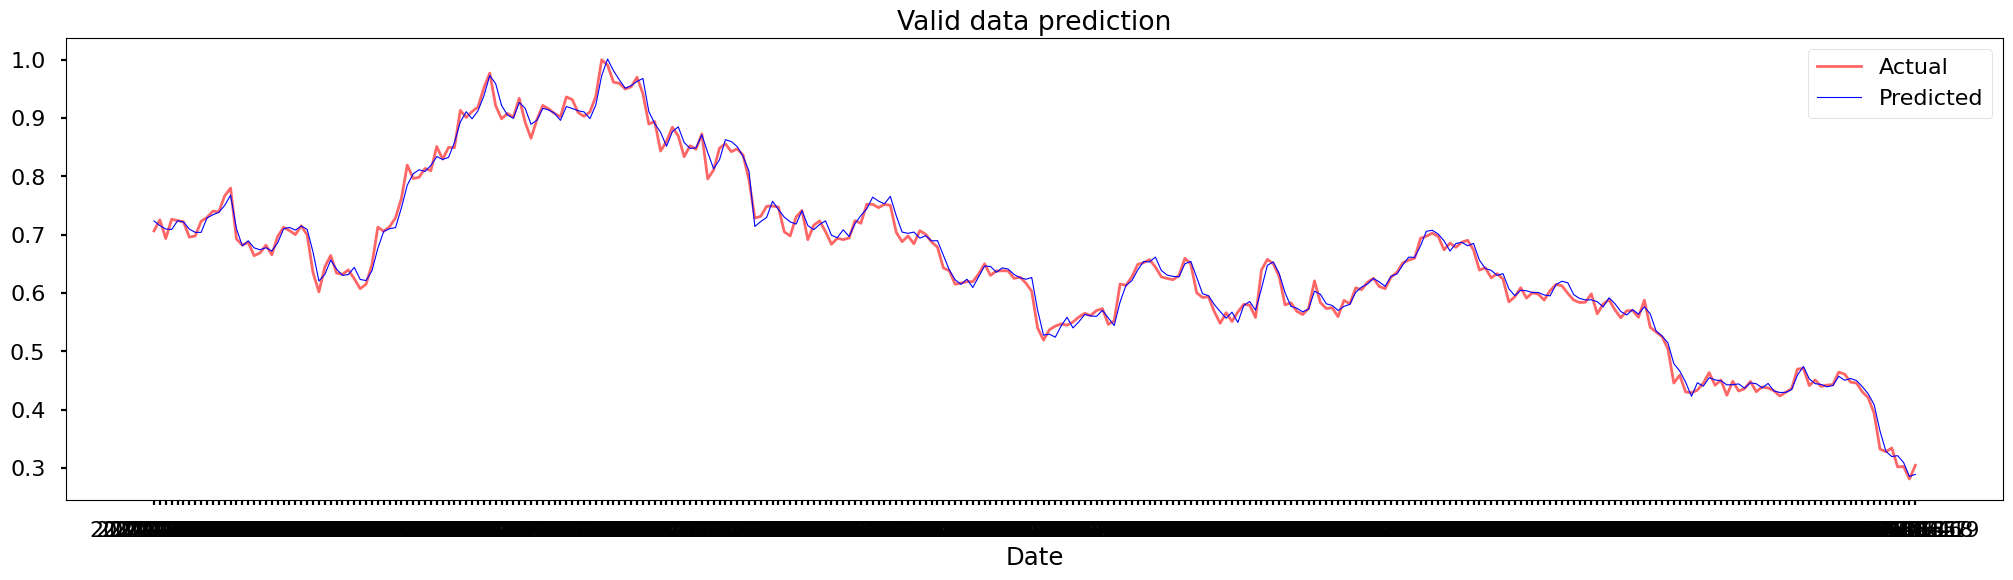

In [178]:
plt.figure(figsize=(25,6))
plt.plot(df[1400:1700]['Date'], y_val_df, color = 'red', linewidth=2.0, alpha = 0.6)
plt.plot(df[1400:1700]['Date'], y_val_pred, color = 'blue', linewidth=0.8)
plt.legend(['Actual','Predicted'])
plt.xlabel('Date')
plt.title("Valid data prediction")
plt.show()

In [179]:
X_new_train_df, X_test_df, y_new_train_df, y_test_df = train_test_split(X_df, y_df, test_size=0.15, shuffle=False)

In [180]:
model=SVR(C=100, cache_size=200, coef0=0.0, degree=3, epsilon=0.01,gamma=0.0001,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [181]:
model.fit(X_new_train_df.drop('Date', axis=1), y_new_train_df)

SVR(C=100, epsilon=0.01, gamma=0.0001)

In [182]:

y_test_df[0:10]

4353    0.304648
4354    0.306841
4355    0.295666
4356    0.312473
4357    0.314342
4358    0.318236
4359    0.311626
4360    0.306986
4361    0.300290
4362    0.297821
Name: BTC_close, dtype: float64

In [183]:
y_test_pred=model.predict(X_test_df.drop('Date', axis=1))
y_test_pred

array([0.30893723, 0.31798623, 0.30998477, 0.31360108, 0.32413497,
       0.32674654, 0.32765241, 0.32530544, 0.32274886, 0.31542787,
       0.30947609, 0.30595115, 0.29646705, 0.29578025, 0.30225148,
       0.30781263, 0.31194647, 0.32271805, 0.33214588, 0.32989381,
       0.32444877, 0.31384848, 0.30439674, 0.2997298 , 0.31275602,
       0.32092212, 0.32598043, 0.32801367, 0.33493562, 0.35064866,
       0.36350808, 0.35833956, 0.3594609 , 0.35297149, 0.35531926,
       0.3464383 , 0.33462436, 0.3472002 , 0.36752644, 0.37595181,
       0.3767825 , 0.37491441, 0.36209786, 0.36077971, 0.36057755,
       0.35544628, 0.35911548, 0.36188514, 0.35957954, 0.36722913,
       0.36460462, 0.36474255, 0.37584988, 0.37569094, 0.38254797,
       0.38107778, 0.38050666, 0.37528392, 0.37163357, 0.36606995,
       0.34990983, 0.33152771, 0.33640203, 0.33676892, 0.33847572,
       0.34036207, 0.34197035, 0.33526635, 0.32212817, 0.31982864,
       0.32014103, 0.32513126, 0.32386136, 0.3180149 , 0.31953

In [184]:
y_test_df = y_test_df.ravel()
y_test_pred = y_test_pred.ravel()

In [185]:
def mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true))

print('MAPE for testing data: ', mape(y_test_df, y_test_pred)*100, '%')


MAPE for testing data:  6.162291804708702 %


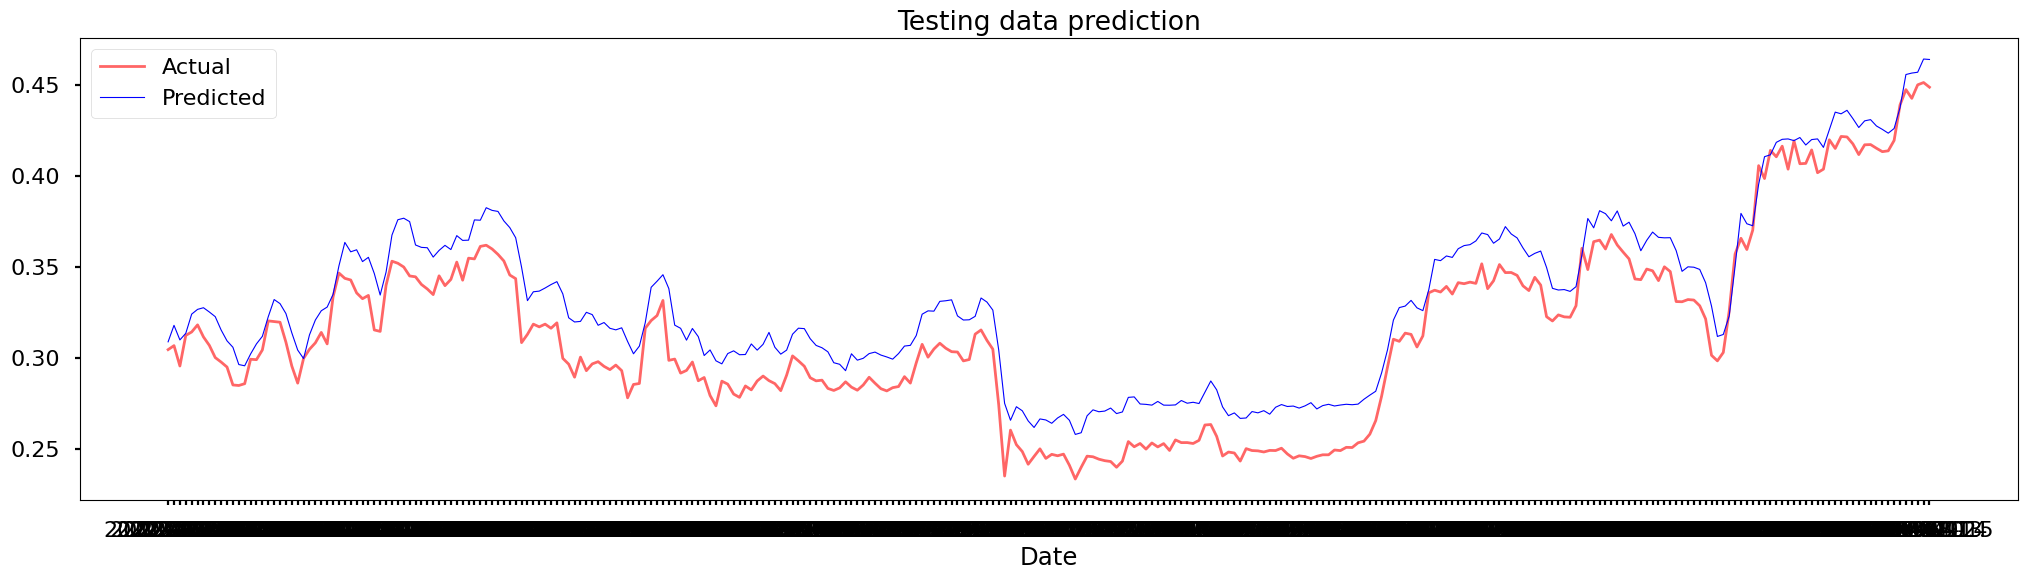

In [186]:
plt.figure(figsize=(25,6))
plt.plot(df[1700:2000]['Date'], y_test_df, color = 'red', linewidth=2.0, alpha = 0.6)
plt.plot(df[1700:2000]['Date'], y_test_pred, color = 'blue', linewidth=0.8)
plt.legend(['Actual','Predicted'])
plt.xlabel('Date')
plt.title("Testing data prediction")
plt.show()

In [187]:
from sklearn.metrics import mean_squared_error,mean_absolute_percentage_error
import numpy as np
true_train=0
prediction_train=0
prediction_test=0
true_test=1
def ACC(true_test,prediction_test):
    count = 0
    for i in range(1,len(true_test)):
        if (true_test[i] - true_test[i-1]) * (prediction_test[i] - prediction_test[i-1]) > 0:
            count += 1
    return count/(len(true_test)-1)
print("Test accuracy for train set")
#RMSE
print("Root Mean Square Error (RMSE):", np.sqrt(mean_squared_error(y_train_df, y_train_pred)))

#MAPE
print(" Mean Absolute Percentage Error (MAPE):", mean_absolute_percentage_error(y_train_df,y_train_pred))
#AUC
print("ACC test:",ACC(y_train_df,y_train_pred))
print()
print("Test accuracy for test set")
#RMSE
print("Root Mean Square Error (RMSE):", np.sqrt(mean_squared_error(y_test_df, y_test_pred)))

#MAPE
print(" Mean Absolute Percentage Error (MAPE):", mean_absolute_percentage_error(y_test_df,y_test_pred))
#AUC
print("ACC test:",AUC(y_test_df,y_test_pred))

Test accuracy for train set
Root Mean Square Error (RMSE): 0.006686726346521376
 Mean Absolute Percentage Error (MAPE): 0.014586325161603056
ACC test: 0.7112223016440314

Test accuracy for test set
Root Mean Square Error (RMSE): 0.019623819359248333
 Mean Absolute Percentage Error (MAPE): 0.06162291804708702
ACC test: 0.6321070234113713
